In [1]:
# k means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_7172\2968149586.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from  sklearn.datasets import make_blobs


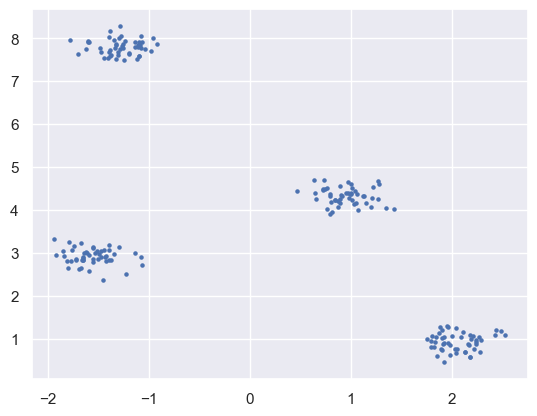

In [3]:
X,y=make_blobs(n_samples=200,centers=4,cluster_std=.20,random_state=0)
#X[:5]
plt.scatter(X[:,0],X[:,1],s=5)

In [4]:
print('printing top 10 x -is input value')
print(X[:10])


printing top 10 x -is input value
[[ 2.11491516  1.16294084]
 [-1.36963842  2.82459844]
 [ 1.01175531  4.22343114]
 [-1.69936862  7.63095865]
 [ 1.90631656  0.73237595]
 [ 0.97837008  4.66096143]
 [-1.58908125  2.93736229]
 [ 0.79871293  3.90762803]
 [ 1.22232821  4.5442633 ]
 [ 1.12208819  4.32958391]]


In [5]:
y[:10]


array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0])

In [6]:
from sklearn.cluster import KMeans

kmn=KMeans(n_clusters=4)# k value

kmn.fit(X) # here kmn is considered as model,here x alone given bcoz its unsupervised

y_Kmn=kmn.predict(X) # y_kmn is similar to ypre

print('actual output    = ',y[120:130]) # printing only top 20 original output
print('predicted output = ',y_Kmn[120:130]) # printing only top20 predicted output


actual output    =  [3 2 0 1 0 2 0 2 1 0]
predicted output =  [1 0 3 2 3 0 3 0 2 3]


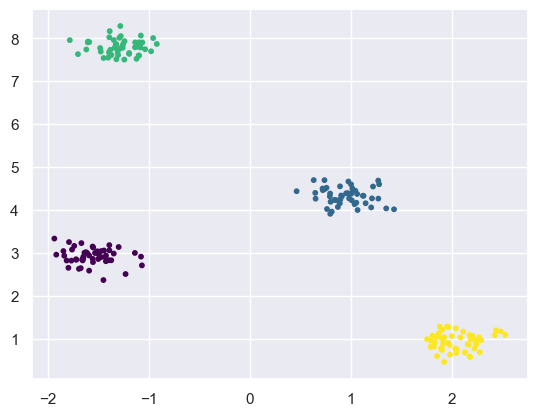

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def finding_cluster(X,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters] # permutation - arrangment
    centers=X[i]
    while 1:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers # centroid updation happens here
    return centers,labels

# function call

centers,labels=finding_cluster(X,4)

plt.scatter(X[:,0],X[:,1],s=10,c=labels,cmap='viridis')

In [8]:
#for i in range(10):
#    print(i,end='')

[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

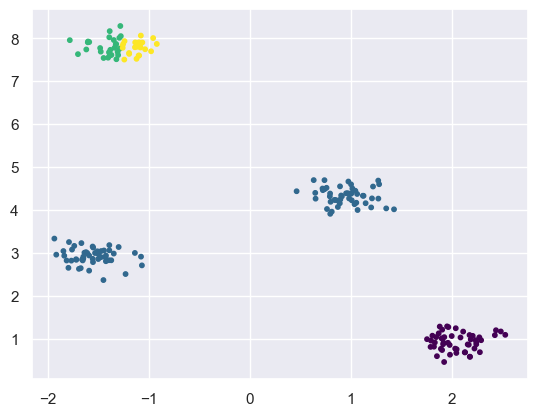

In [9]:
centers,labels=finding_cluster(X,4,rseed=10)
plt.scatter(X[:,0],X[:,1],s=10,c=labels,cmap='viridis')

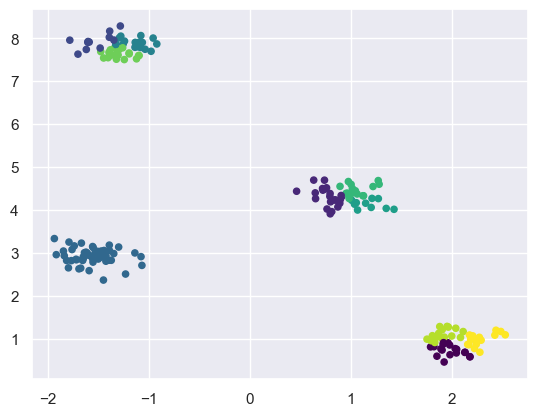

In [10]:
labels=KMeans(10,random_state=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=20,c=labels,cmap='viridis')

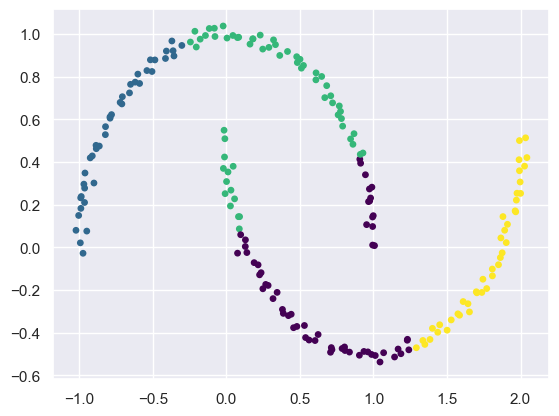

In [11]:
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=0.02,random_state=2)
labels=KMeans(4,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=15,c=labels,cmap='viridis')

In [13]:
#kmeans on digits
from sklearn.datasets import load_digits
digit=load_digits()
print(digit.data.shape)
print(digit.data.size)


(1797, 64)
115008


In [14]:
kmeans=KMeans(n_clusters=10,random_state=2)# invoking k means algorithm thats already import
clusters=kmeans.fit_predict(digit.data) # here digit.data is X
kmeans.cluster_centers_.shape

(10, 64)

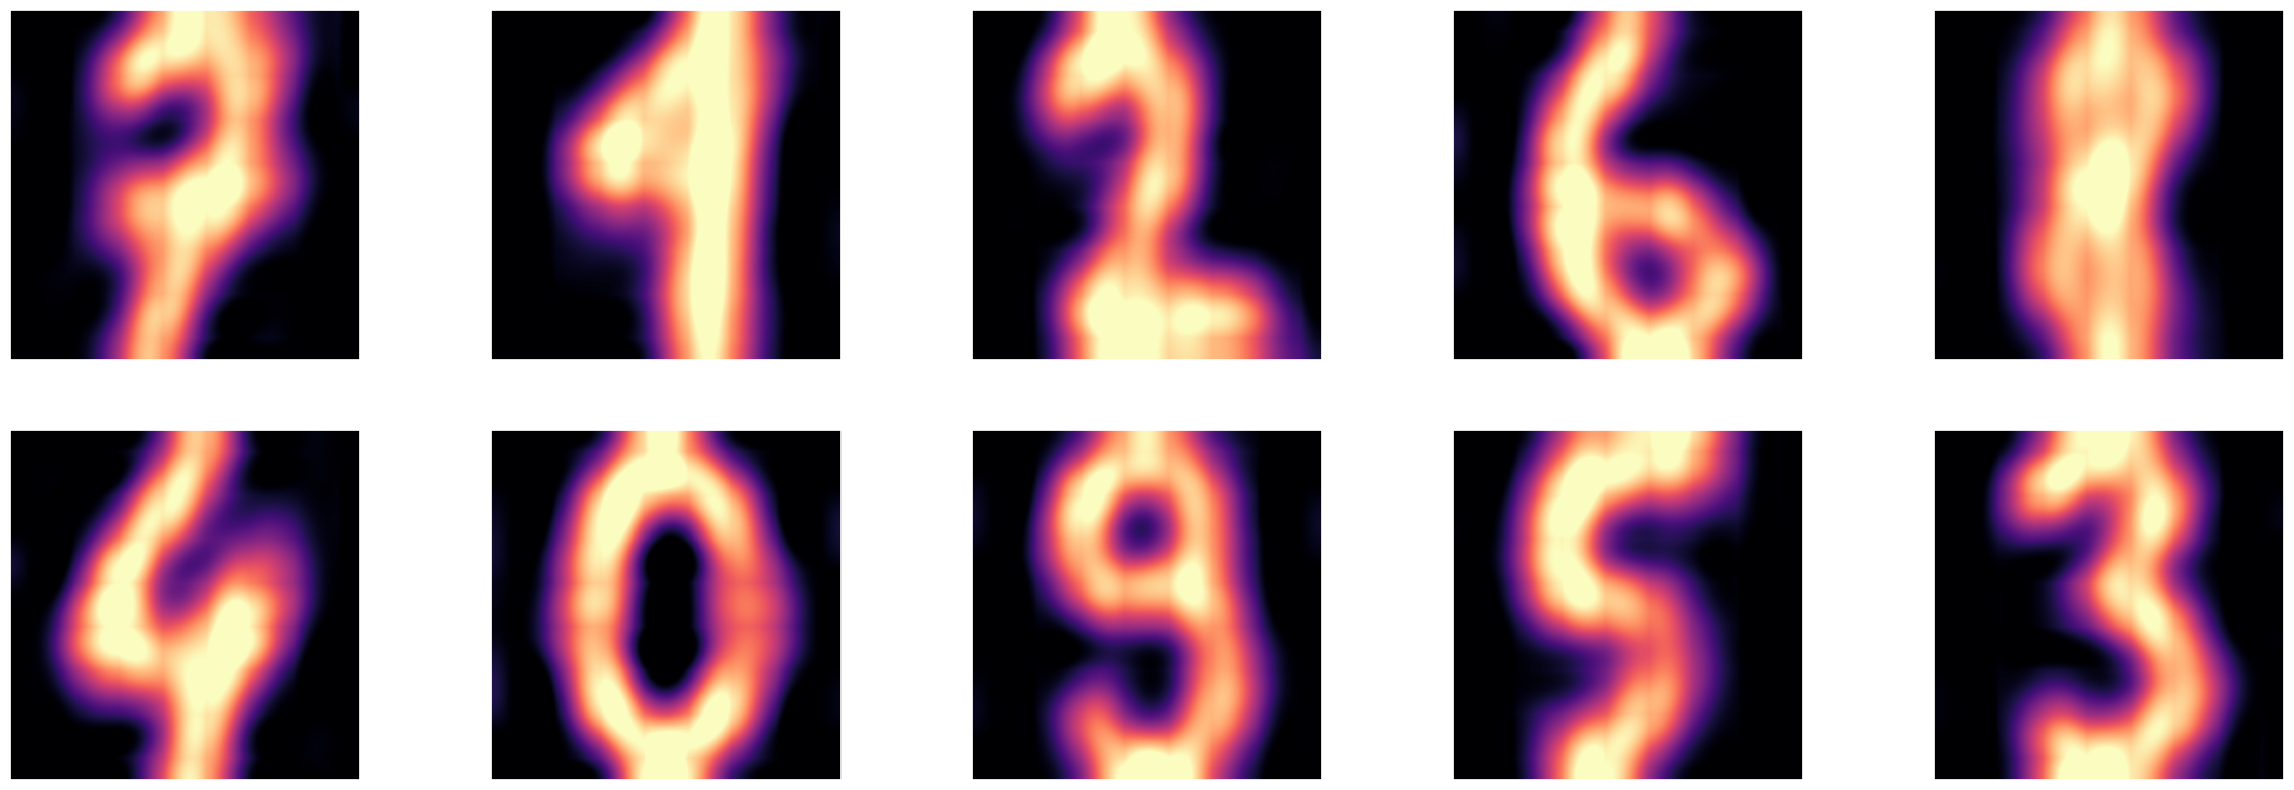

In [16]:
#plotting digits
fig,ax=plt.subplots(2,5,figsize=(30,10))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):# to avoid multiple for loop we can ZIP
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='sinc',cmap='magma')

In [17]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(i==clusters)
    labels[mask]=mode(digit.target[mask])[0]

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digit.target,labels)

0.7952142459654981

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
mtrx=confusion_matrix(digit.target,labels)
print(mtrx)


[[177   0   0   0   1   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  10 148  13   0   0   0   3   0   2]
 [  0   7   0 154   0   2   0   7   0  13]
 [  0   7   0   0 166   0   0   8   0   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   2   0   0   0   0   0 177   0   0]
 [  0 105   3   2   0   4   2   5   0  53]
 [  0  21   0   6   0   6   0   7   0 140]]


In [19]:
creport = classification_report(digit.target,labels)
print(creport)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.50      0.85      0.63       182
           2       0.85      0.84      0.84       177
           3       0.88      0.84      0.86       183
           4       0.98      0.92      0.95       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.00      0.00      0.00       174
           9       0.56      0.78      0.65       180

    accuracy                           0.80      1797
   macro avg       0.75      0.79      0.76      1797
weighted avg       0.75      0.80      0.77      1797



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(80.90000000000006, 0.5, 'predicted value')

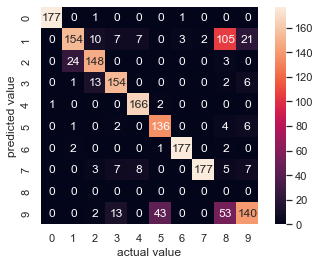

In [20]:
sns.heatmap(mtrx.T,square=True,cbar=True,annot=True,fmt='d',
            xticklabels=digit.target_names,yticklabels=digit.target_names)
plt.xlabel('actual value')
plt.ylabel('predicted value')

In [21]:
import PIL # deep learning - digital image processing - opencv - computer vision

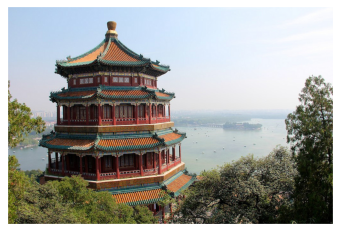

In [22]:
from sklearn.datasets import load_sample_image
name=load_sample_image('china.jpg')
fig,ax=plt.subplots()
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(name)

In [23]:
#Image dimesion
name.shape


(427, 640, 3)

In [24]:
data=name/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [25]:
#plotting pixels using functions(Display laksh of colours using 10000 samples)
def plotting_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=15)

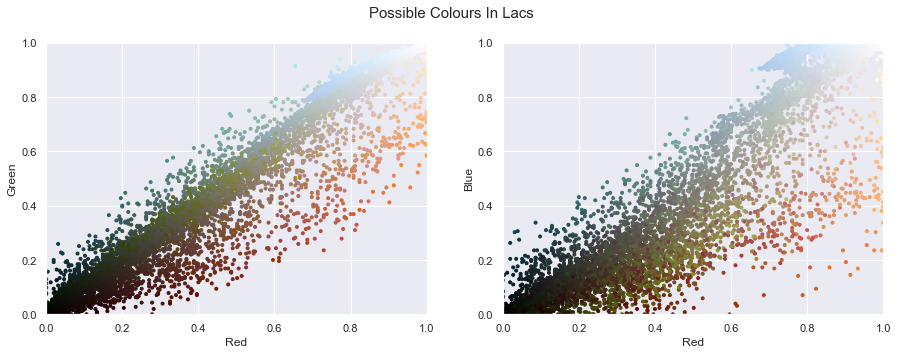

In [26]:
plotting_pixels(data,title='Possible Colours In Lacs')

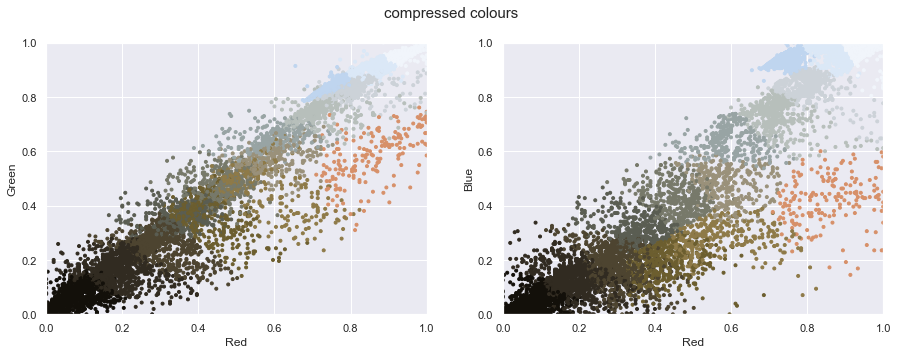

In [27]:
#Reduccing the issues of numpy using warnings
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmnz=MiniBatchKMeans(15)
kmnz.fit(data)
newcolors=kmnz.cluster_centers_[kmnz.predict(data)]
plotting_pixels(data,colors=newcolors,title='compressed colours')

Text(0.5, 1.0, 'Compressed Image')

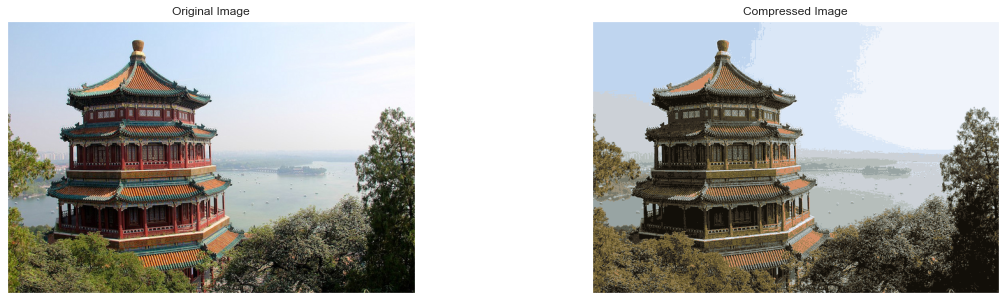

In [28]:
#compressing the color of china Image
name_compressed=newcolors.reshape(name.shape)
fig,ax=plt.subplots(1,2,figsize=(20,5),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.1)
ax[0].imshow(name)
ax[0].set_title('Original Image')
ax[1].imshow(name_compressed)
ax[1].set_title('Compressed Image')